In [5]:
using LinearAlgebra
using DataFrames

In [6]:
df = DataFrame(vectorSize=Int64[])
for i in 1:10
    df[!, "dotProdTime$i"] = Float64[]
end
df.matrixSize = Int64[]
for i in 1:10
    df[!, "matMulTime$i"] = Float64[]
end

In [ ]:
for elements in 1000:1000:20000
    vec = rand(elements * 100)
    mat_vec = rand(elements)
    mat = rand(elements, elements)
    dotProdTimes = [@elapsed dot(vec, vec) for _ in 1:11][2:11]
    matMultTimes = [@elapsed mat * mat_vec for _ in 1:11][2:11]
    push!(df, vcat(elements * 100, dotProdTimes, elements, matMultTimes))
end

In [118]:
using CSV
CSV.write("timemeasurements1.csv", df)

"timemeasurements1.csv"

In [1]:
using CSV
using Plots
using Statistics

In [5]:
df = CSV.read("timemeasurements1.csv", delim=",", DataFrame)

Row,vectorSize,dotProdTime1,dotProdTime2,dotProdTime3,dotProdTime4,dotProdTime5,dotProdTime6,dotProdTime7,dotProdTime8,dotProdTime9,dotProdTime10,matrixSize,matMulTime1,matMulTime2,matMulTime3,matMulTime4,matMulTime5,matMulTime6,matMulTime7,matMulTime8,matMulTime9,matMulTime10
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100000,1.6991e-5,1.3749e-5,1.3713e-5,1.3765e-5,1.3157e-5,1.369e-5,1.4181e-5,1.3637e-5,1.3624e-5,1.6433e-5,1000,0.000248867,0.000189845,0.000183572,0.00017252,0.000173963,0.000173348,0.000171776,0.000174954,0.000172621,0.000179386
2,200000,2.6928e-5,2.5922e-5,2.6212e-5,2.9973e-5,5.5612e-5,3.4875e-5,2.9725e-5,2.5664e-5,2.5516e-5,2.5527e-5,2000,0.00166292,0.00165316,0.00168951,0.00166491,0.00166437,0.00163327,0.00170429,0.00169475,0.00156317,0.00148889
3,300000,2.9308e-5,2.494e-5,2.4761e-5,2.4623e-5,2.4809e-5,2.4714e-5,2.4539e-5,2.4753e-5,2.4658e-5,2.4573e-5,3000,0.00325537,0.00329237,0.0033743,0.00337223,0.0033267,0.00336781,0.00334499,0.00341636,0.00341916,0.00337256
4,400000,0.000104932,6.5045e-5,5.2766e-5,4.7255e-5,4.5645e-5,4.3541e-5,4.2654e-5,4.1845e-5,4.1379e-5,4.0971e-5,4000,0.00567937,0.00571751,0.00573772,0.00591731,0.00592354,0.0058786,0.00582498,0.00590345,0.00583338,0.00584883
5,500000,4.9182e-5,4.0096e-5,4.0235e-5,3.9855e-5,4.0003e-5,3.9916e-5,3.9913e-5,3.9892e-5,4.0092e-5,3.9853e-5,5000,0.00916474,0.00897633,0.00895736,0.00897666,0.00886612,0.00896011,0.00890257,0.00896031,0.00893965,0.00899754
6,600000,6.2563e-5,4.8374e-5,4.8525e-5,4.8102e-5,4.8029e-5,4.8107e-5,4.789e-5,4.884e-5,5.5868e-5,4.9286e-5,6000,0.0127281,0.0127677,0.012729,0.0126595,0.0127464,0.012916,0.0129613,0.0127958,0.0127393,0.0127612
7,700000,8.2901e-5,6.0896e-5,5.957e-5,5.8379e-5,5.8081e-5,5.8353e-5,5.8297e-5,5.8342e-5,5.8571e-5,5.9229e-5,7000,0.0171953,0.0171687,0.0172333,0.0185236,0.0196541,0.0194308,0.0193723,0.0190313,0.0194662,0.0191208
8,800000,0.000156666,0.000129766,0.000119792,0.000119869,0.00012436,0.000115132,0.000118713,0.000117988,0.000133343,0.0001205,8000,0.0261402,0.0236682,0.0225796,0.0226852,0.0230077,0.0226463,0.0226348,0.0228571,0.0227949,0.0235922
9,900000,0.000265599,0.000191145,0.000150944,0.000139393,0.000133675,0.00013086,0.000128114,0.0001347,0.000137249,0.000137818,9000,0.0314681,0.0311445,0.0313076,0.0316538,0.0324726,0.031812,0.0322919,0.0336602,0.0336317,0.0328351


In [6]:
df = transform(df, AsTable(2:11) => ByRow(mean) => :dotProdMeanTime)
df = transform(df, AsTable(2:11) => ByRow(std) => :dotProdTimeStdDev)
df = transform(df, AsTable(13:22) => ByRow(mean) => :matMulMeanTime)
df = transform(df, AsTable(13:22) => ByRow(std) => :matMulTimeStdDev)

Row,vectorSize,dotProdTime1,dotProdTime2,dotProdTime3,dotProdTime4,dotProdTime5,dotProdTime6,dotProdTime7,dotProdTime8,dotProdTime9,dotProdTime10,matrixSize,matMulTime1,matMulTime2,matMulTime3,matMulTime4,matMulTime5,matMulTime6,matMulTime7,matMulTime8,matMulTime9,matMulTime10,dotProdMeanTime,dotProdTimeStdDev,matMulMeanTime,matMulTimeStdDev
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,100000,1.6991e-5,1.3749e-5,1.3713e-5,1.3765e-5,1.3157e-5,1.369e-5,1.4181e-5,1.3637e-5,1.3624e-5,1.6433e-5,1000,0.000248867,0.000189845,0.000183572,0.00017252,0.000173963,0.000173348,0.000171776,0.000174954,0.000172621,0.000179386,1.4294e-5,1.30446e-6,0.000184085,2.34995e-5
2,200000,2.6928e-5,2.5922e-5,2.6212e-5,2.9973e-5,5.5612e-5,3.4875e-5,2.9725e-5,2.5664e-5,2.5516e-5,2.5527e-5,2000,0.00166292,0.00165316,0.00168951,0.00166491,0.00166437,0.00163327,0.00170429,0.00169475,0.00156317,0.00148889,3.05954e-5,9.28321e-6,0.00164192,6.68677e-5
3,300000,2.9308e-5,2.494e-5,2.4761e-5,2.4623e-5,2.4809e-5,2.4714e-5,2.4539e-5,2.4753e-5,2.4658e-5,2.4573e-5,3000,0.00325537,0.00329237,0.0033743,0.00337223,0.0033267,0.00336781,0.00334499,0.00341636,0.00341916,0.00337256,2.51678e-5,1.4595e-6,0.00335419,5.13887e-5
4,400000,0.000104932,6.5045e-5,5.2766e-5,4.7255e-5,4.5645e-5,4.3541e-5,4.2654e-5,4.1845e-5,4.1379e-5,4.0971e-5,4000,0.00567937,0.00571751,0.00573772,0.00591731,0.00592354,0.0058786,0.00582498,0.00590345,0.00583338,0.00584883,5.26033e-5,1.97998e-5,0.00582647,8.70856e-5
5,500000,4.9182e-5,4.0096e-5,4.0235e-5,3.9855e-5,4.0003e-5,3.9916e-5,3.9913e-5,3.9892e-5,4.0092e-5,3.9853e-5,5000,0.00916474,0.00897633,0.00895736,0.00897666,0.00886612,0.00896011,0.00890257,0.00896031,0.00893965,0.00899754,4.09037e-5,2.91136e-6,0.00897014,7.84414e-5
6,600000,6.2563e-5,4.8374e-5,4.8525e-5,4.8102e-5,4.8029e-5,4.8107e-5,4.789e-5,4.884e-5,5.5868e-5,4.9286e-5,6000,0.0127281,0.0127677,0.012729,0.0126595,0.0127464,0.012916,0.0129613,0.0127958,0.0127393,0.0127612,5.05584e-5,4.84587e-6,0.0127804,9.11318e-5
7,700000,8.2901e-5,6.0896e-5,5.957e-5,5.8379e-5,5.8081e-5,5.8353e-5,5.8297e-5,5.8342e-5,5.8571e-5,5.9229e-5,7000,0.0171953,0.0171687,0.0172333,0.0185236,0.0196541,0.0194308,0.0193723,0.0190313,0.0194662,0.0191208,6.12619e-5,7.65091e-6,0.0186196,0.00102724
8,800000,0.000156666,0.000129766,0.000119792,0.000119869,0.00012436,0.000115132,0.000118713,0.000117988,0.000133343,0.0001205,8000,0.0261402,0.0236682,0.0225796,0.0226852,0.0230077,0.0226463,0.0226348,0.0228571,0.0227949,0.0235922,0.000125613,1.22542e-5,0.0232606,0.001084
9,900000,0.000265599,0.000191145,0.000150944,0.000139393,0.000133675,0.00013086,0.000128114,0.0001347,0.000137249,0.000137818,9000,0.0314681,0.0311445,0.0313076,0.0316538,0.0324726,0.031812,0.0322919,0.0336602,0.0336317,0.0328351,0.00015495,4.29229e-5,0.0322278,0.000916234


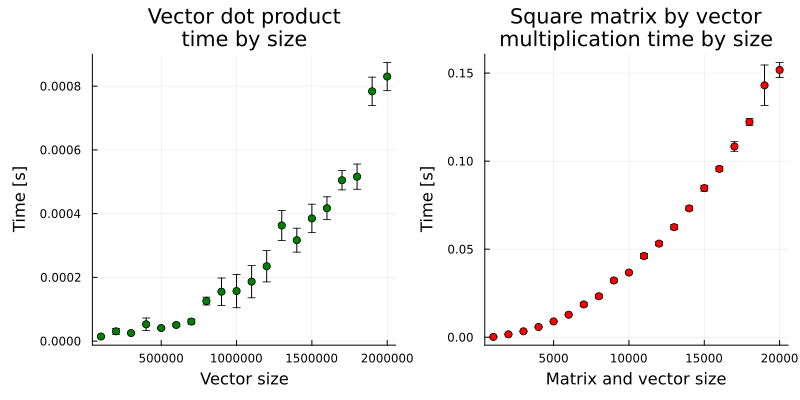

In [8]:
using Plots.PlotMeasures
dotProdPlot = scatter(df.vectorSize, df.dotProdMeanTime, yerr=df.dotProdTimeStdDev, xformatter=x -> "$(Int64(x))", title="Vector dot product\ntime by size", xlabel="Vector size", ylabel="Time [s]", legend=false, color=:green)
matMulPlot = scatter(df.matrixSize, df.matMulMeanTime, yerr=df.matMulTimeStdDev, xformatter=x -> "$(Int64(x))", title="Square matrix by vector\nmultiplication time by size", xlabel="Matrix and vector size", ylabel="Time [s]", legend=false, color=:red)
timePlot = plot(dotProdPlot, matMulPlot, layout=2, size=(800,400), bottom_margin=5mm, left_margin=5mm, top_margin=5mm)